* LEE MENG KEONG 18WMR12674
* CHOONG LIK XIAN 18WMR12342
* ONG ZHI CHUEN 18WMR12486

# Data Science Assignment
1. [Business Understanding](#A.-Business-Understanding)
2. [Data Understanding](#B.-Data-Understanding)
3. [Data Preparation](#C.-Data-Preparation)
4. [Modelling](#D.-Modelling)
5. [Evaluation](#E.-Evaluation)
6. [Deployment](#F.-Deployment)
7. [Conclusion](#H.-Conclusion)
8. [References](#I.-References)

## A. Business Understanding
The objective of this assignment is to predict the popularity of the song with 18 attributes. All the 18 attributes are acousticness, artists, danceability, duration_ms, energy, explicit, id, instrumentalness, key, liveness, loudness, mode, name, release_date, speechiness, tempo, valence and year. In the meanwhile the popularity attribute is used as the predicting class.

We would like to study what kind of the song are mostly like by the spotify user. By doing that we will study the popularity of the song with its total 18 attributes

2 training model will be tried in this assignment which are K-Nearest Neighbors(KNN) and Support Vector Classifier(SVC). The reason of choosing KNN and SVC is because they able to classify the data result. For example result like binary data (0 and 1). At last we will compare the performance of both KNN and SVC.

## B. Data Understanding

In [262]:
import pandas as pd
import statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score , cross_val_predict, cross_validate
import matplotlib.pyplot as plt
import numpy as np

* Read the dataset that acquired from kaggle.com which is data.csv
* the source is from https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [263]:
song = pd.read_csv("data.csv")
song.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [264]:
song.corr()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.265950,-0.079311,-0.750283,-0.253690,0.335821,-0.021686,-0.023871,-0.567072,0.046475,-0.593345,-0.056077,-0.204982,-0.185540,-0.624550
danceability,-0.265950,1.000000,-0.134500,0.220569,0.241891,-0.281429,0.022599,-0.105532,0.294170,-0.045306,0.221077,0.225305,-0.004872,0.560242,0.203430
duration_ms,-0.079311,-0.134500,1.000000,0.036396,-0.043811,0.084814,-0.003116,0.034270,-0.014687,-0.046981,0.063292,-0.058449,-0.028816,-0.198760,0.076293
energy,-0.750283,0.220569,0.036396,1.000000,0.142677,-0.287692,0.029984,0.126293,0.782982,-0.038355,0.497488,-0.045226,0.249936,0.350086,0.532419
explicit,-0.253690,0.241891,-0.043811,0.142677,1.000000,-0.138292,0.008578,0.039272,0.152695,-0.083221,0.214044,0.413074,0.011484,-0.022327,0.245227
instrumentalness,0.335821,-0.281429,0.084814,-0.287692,-0.138292,1.000000,-0.014268,-0.047397,-0.417033,-0.035051,-0.299829,-0.115735,-0.107570,-0.193929,-0.291571
key,-0.021686,0.022599,-0.003116,0.029984,0.008578,-0.014268,1.000000,-0.000106,0.021920,-0.112766,0.010675,0.015225,0.003148,0.029064,0.012503
liveness,-0.023871,-0.105532,0.034270,0.126293,0.039272,-0.047397,-0.000106,1.000000,0.052985,0.005393,-0.075293,0.147667,0.008124,-0.000426,-0.055839
loudness,-0.567072,0.294170,-0.014687,0.782982,0.152695,-0.417033,0.021920,0.052985,1.000000,-0.013147,0.466546,-0.105796,0.211114,0.308418,0.490118
mode,0.046475,-0.045306,-0.046981,-0.038355,-0.083221,-0.035051,-0.112766,0.005393,-0.013147,1.000000,-0.032854,-0.057493,0.014539,0.014727,-0.033084


**Observation**
* danceability, energy, explicit, loudness, tempo have correlation with popularity. So I conclude that these 5 attributes are the most important and relate to popularity

In [265]:
song.describe(include=['object'])

,artists,id,name,release_date
count,169909,169909,169909,169909
unique,33375,169909,132940,10882
top,['Эрнест Хемингуэй'],6NY8PMePZSyy2YPzJlhO7H,Summertime,1945
freq,1215,1,62,1449


In [266]:
song.describe(include=['number'])

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [267]:
song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

This dataset consists of 169909 sample with 4 objects and 15 numeric attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DA7736ADC0>,
      dtype=object)

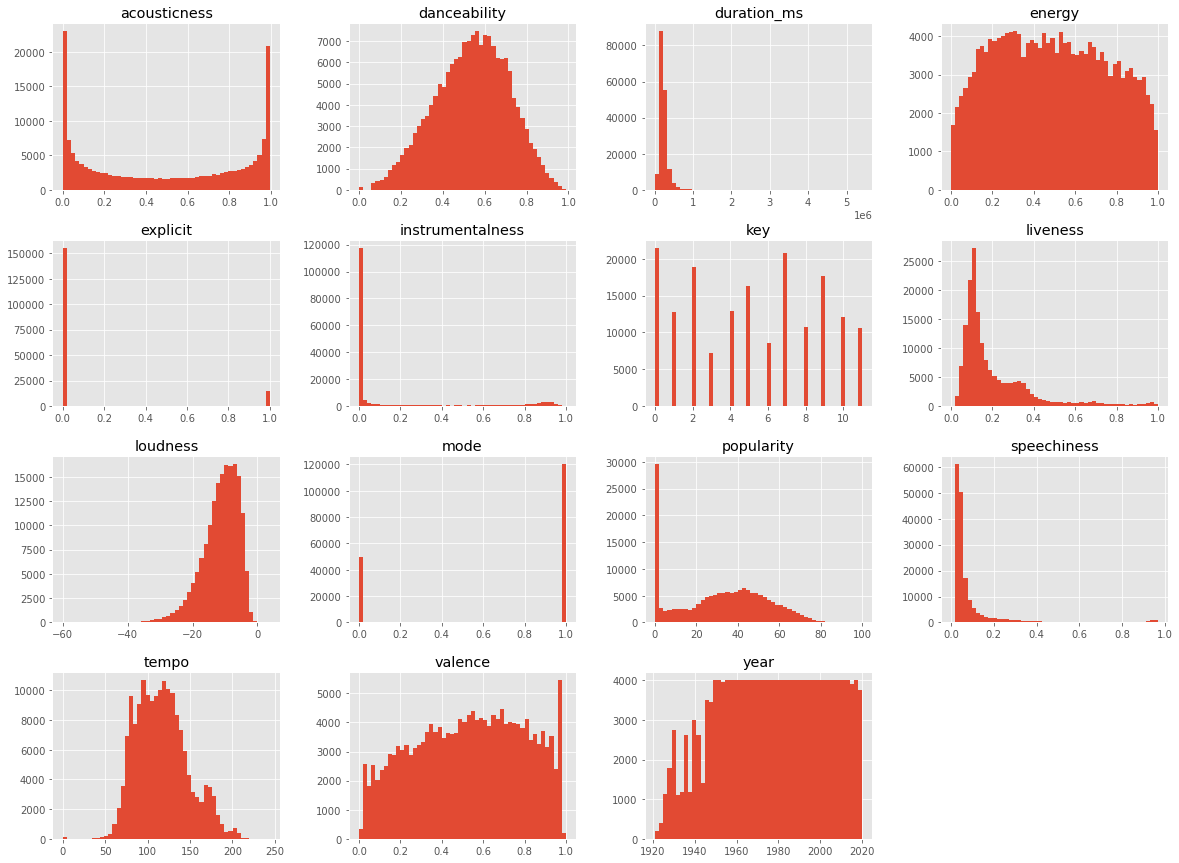

In [268]:
song.hist(bins=50,figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DA04CF1FD0>,
      dtype=object)

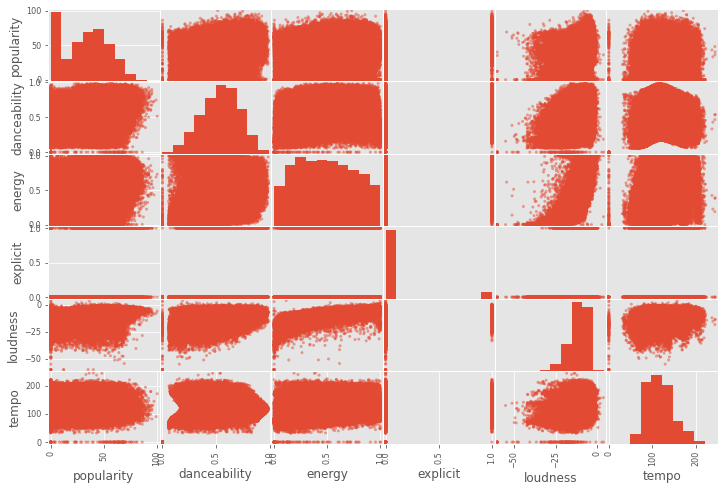

In [269]:
from pandas.plotting import scatter_matrix
selected_cols = ['popularity', 'danceability', 'energy', 'explicit', 'loudness', 'tempo']
scatter_matrix(song[selected_cols],figsize=(12,8))

Observation:
* We are not able to retrieve any useful information due to the data is too large

## C. Data Preparation

Here i will categorize population into 0(not popular) and 1(popular)



In [270]:
song['popularity'] = [0 if x <= statistics.median(song['popularity']) else 1 for x in song['popularity']]

Here we will check is there any missing value or normally we call it null value

In [271]:
song.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

No missing value or null value in the data set

Before we split the data into training set and testing set. We separate the output(y) from input(x). At the same time i also drop away data that is in string type because it is not important or useful like artists, id, name, release_date and also data which not important like year.

In [272]:
X = song.drop(['popularity', 'artists', 'id', 'name', 'release_date', 'year'], axis=1)
y = song.popularity

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print ('full set shape=', X.shape)
print ('train shape=', X_train.shape)
print ('test shape=', X_test.shape)

full set shape= (169909, 13)
train shape= (135927, 13)
test shape= (33982, 13)


In [274]:
X_train

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
12771,0.03200,0.442,249933,0.428,0,0.004940,0,0.0964,-14.211,1,0.0347,121.453,0.384
102731,0.10100,0.560,255880,0.544,0,0.000074,5,0.2170,-11.097,0,0.3330,111.161,0.685
160200,0.00413,0.570,180267,0.927,0,0.000000,7,0.1520,-2.024,1,0.0382,122.868,0.579
40564,0.99400,0.312,148240,0.211,0,0.923000,3,0.3550,-15.782,0,0.0782,79.054,0.511
17516,0.70100,0.612,80720,0.106,0,0.000000,0,0.2810,-29.705,1,0.7720,135.338,0.755
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82270,0.28900,0.351,165467,0.749,0,0.000000,2,0.0952,-9.435,1,0.0628,160.673,0.967
65615,0.34300,0.646,154693,0.816,0,0.815000,2,0.0372,-7.474,1,0.0479,89.926,0.518
77655,0.10300,0.418,355627,0.344,0,0.198000,7,0.2140,-8.420,1,0.0391,111.709,0.231
56088,0.96600,0.509,548813,0.183,0,0.027800,0,0.1130,-16.363,1,0.0839,81.299,0.253


In [275]:
X_test

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
37683,0.158,0.605,270800,0.737,0,0.000254,5,0.0989,-8.917,1,0.0428,98.428,0.375
5821,0.168,0.430,276333,0.634,0,0.000011,2,0.8980,-10.458,1,0.0462,123.382,0.327
113933,0.043,0.542,335840,0.842,1,0.000153,1,0.1730,-7.137,1,0.1730,104.772,0.301
26214,0.961,0.578,290907,0.261,0,0.861000,0,0.0933,-14.307,0,0.0342,93.947,0.449
57516,0.511,0.677,146653,0.641,0,0.000000,1,0.2750,-6.113,0,0.0433,128.015,0.795
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17311,0.962,0.409,189827,0.194,0,0.000490,3,0.1940,-19.877,1,0.0509,117.342,0.288
164330,0.496,0.521,374133,0.416,0,0.000428,7,0.2650,-10.898,0,0.0260,139.282,0.611
17576,0.894,0.510,505549,0.118,0,0.000002,10,0.3080,-21.856,1,0.3630,121.080,0.227
147968,0.289,0.767,206280,0.700,0,0.000114,8,0.0432,-3.603,1,0.0399,114.884,0.791


Before continue with the prediction, use scaling to make sure all attributes are standardize between each attributes and able to uniformly evaluated

In [276]:
scaler = StandardScaler(copy = False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('>>> Mean of all columns:\n', X_train.mean(axis=0))
print('\n>>> Std of all columns:\n', X_train.std(axis=0))

>>> Mean of all columns:
 [ 5.64557560e-17 -1.88002895e-16  6.63877872e-18 -9.94771330e-17
 -6.90014796e-18 -1.05174982e-16 -5.41557067e-17 -2.38682391e-16
  1.61944382e-16 -9.49293082e-17 -6.83741934e-17  6.41922855e-17
  4.18060101e-17]

>>> Std of all columns:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [277]:
print(X_train[0])

[-1.22398321 -0.54902506  0.1538757  -0.22944134 -0.30571335 -0.5065219
 -1.47927473 -0.6240376  -0.50436343  0.64112487 -0.39592225  0.14534453
 -0.56631035]


In [278]:
print(X_test)

[[-0.88927839  0.38034706  0.32611915 ... -0.34173179 -0.60415096
  -0.60059935]
 [-0.86271452 -0.6174451   0.37179045 ... -0.31898517  0.20813614
  -0.78347404]
 [-1.19476295  0.02114188  0.86298186 ...  0.5293297  -0.39764502
  -0.88253116]
 ...
 [ 1.06582279 -0.16131154  2.26381879 ...  1.80046397  0.13320286
  -1.16446296]
 [-0.54129163  1.30401751 -0.2064513  ... -0.36113331 -0.06848548
   0.98431455]
 [ 0.09889775 -0.20122323 -0.37989989 ... -0.2273297  -0.66482673
  -0.96634872]]


In [279]:
y_train

12771     0
102731    1
160200    1
40564     0
17516     0
         ..
82270     1
65615     0
77655     1
56088     0
38408     1
Name: popularity, Length: 135927, dtype: int64

In [280]:
y_test

37683     1
5821      1
113933    1
26214     0
57516     0
         ..
17311     0
164330    0
17576     0
147968    1
98854     0
Name: popularity, Length: 33982, dtype: int64

## D. Modelling

### K-Nearest Neighbors Algorithm

In [281]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Support Vector Classifier

In [282]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

## E. Evaluation

We want to see the training accuracy of KNN and SVC

#### K-Nearest Neighbors Training Accuracy

In [283]:
pred_knn = knn.predict(X_train)
train_acc_knn = accuracy_score(y_train, pred_knn)
print("Training accuracy of K-Nerest Neighbors : {:.4f}".format(train_acc_knn))

Training accuracy of K-Nerest Neighbors : 0.8311


#### K-fold cross validation

In [284]:
knn_result = cross_validate (knn, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
print("KNeighborsClassifier: validation accuracy  = {:.4f}".format(knn_result['test_accuracy'].mean()))
print('KNeighborsClassifier: validation recall    = {:.4f}'.format(knn_result['test_recall'].mean()))
print('KNeighborsClassifier: validation precision = {:.4f}'.format(knn_result['test_precision'].mean()))
print('KNeighborsClassifier: validation f1        = {:.4f}'.format(knn_result['test_f1'].mean()))

KNeighborsClassifier: validation accuracy  = 0.7582
KNeighborsClassifier: validation recall    = 0.7628
KNeighborsClassifier: validation precision = 0.7564
KNeighborsClassifier: validation f1        = 0.7596


#### Testing Accuracy

In [285]:
pred_knn = knn.predict(X_test)
test_acc_knn = accuracy_score(y_test, pred_knn)
print("Testing accuracy of KNeighbors Classifier : {:.4f}".format(test_acc_knn))

Testing accuracy of KNeighbors Classifier : 0.7632


In [286]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_knn)
cm

array([[13014,  4090],
       [ 3958, 12920]], dtype=int64)

#### Support Vector Classifier Training Accuracy

In [287]:
pred_svc = svc.predict(X_train)
train_acc_svc = accuracy_score(y_train, pred_svc)
print("Training accuracy of SVC : {:.4f}".format(train_acc_svc))

Training accuracy of SVC : 0.7882


#### K-fold cross validation

In [288]:
svc_result = cross_validate (svc, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
print("SupportVectorClassifier: validation accuracy  = {:.4f}".format(svc_result['test_accuracy'].mean()))
print('SupportVectorClassifier: validation recall    = {:.4f}'.format(svc_result['test_recall'].mean()))
print('SupportVectorClassifier: validation precision = {:.4f}'.format(svc_result['test_precision'].mean()))
print('SupportVectorClassifier: validation f1        = {:.4f}'.format(svc_result['test_f1'].mean()))

SupportVectorClassifier: validation accuracy  = 0.7844
SupportVectorClassifier: validation recall    = 0.7939
SupportVectorClassifier: validation precision = 0.7795
SupportVectorClassifier: validation f1        = 0.7866


#### Testing Accuracy

In [289]:
pred_svc = svc.predict(X_test)
test_acc_svc = accuracy_score(y_test, pred_svc)
print("Testing accuracy of SVC : {:.4f}".format(test_acc_svc))

Testing accuracy of SVC : 0.7852


In [290]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_svc)
cm

array([[13313,  3791],
       [ 3507, 13371]], dtype=int64)

#### Comparing model

In [291]:
print('Computing scores for KNN...', end = '')
y_scores_knn = cross_val_predict (knn, X_train, y_train, cv=5, method = 'predict_proba')
print('done')
print('Computing scores for SVC...', end = '')
y_scores_svc = cross_val_predict (svc, X_train, y_train, cv=5, method = 'decision_function')
print('done')

Computing scores for KNN...done
Computing scores for SVC...done


In [292]:
y_scores_knn = y_scores_knn[:, 1]

In [293]:
from sklearn.metrics import roc_curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve (y_train, y_scores_knn)
fpr_svc, tpr_svc, thresholds_svc = roc_curve (y_train, y_scores_svc)

In [294]:
def plot_roc_curve (fpr, tpr, style = 'b-', label = None):
    plt.plot(fpr, tpr, style, linewidth = 3, label = label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel ('False Positive Rate')
    plt.ylabel ('True Positive Rate')
    plt.title('TPR vs FPR', fontsize=20)

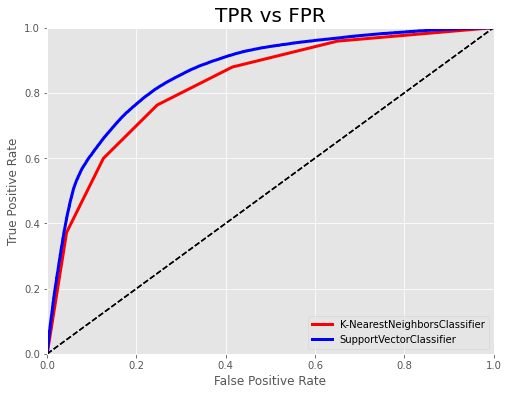

In [295]:
plt.figure(figsize = (8, 6))
plot_roc_curve(fpr_knn, tpr_knn, 'r-', 'K-NearestNeighborsClassifier')
plot_roc_curve(fpr_svc, tpr_svc, 'b-', 'SupportVectorClassifier')
plt.legend (loc='lower right')
plt.show()

In [296]:
from sklearn.metrics import roc_auc_score
auc_knn = roc_auc_score(y_train, y_scores_knn)
print('AUC for K-NearestNeighbors = {:.4f}'.format(auc_knn))
auc_svc = roc_auc_score(y_train, y_scores_svc)
print('AUC for SupportVectorClassifier = {:.4f}'.format(auc_svc))

AUC for K-NearestNeighbors = 0.8273
AUC for SupportVectorClassifier = 0.8620


From the result of Area Under Curve we can see that Support Vector Classifier has larger area than K-Nearest Neighbors, mean Support Vector Classifier is better

## F. Deployment

After we obtain the accuracy of this model, Spotify will implement it in their song mobile applications. By using the model, they can obtain the result of what type of songs their users prefer to listen to, and able to generate a song playlist for all users. Besides, when there is a new song added to their applications, they can continue to analyse what type of song is becoming the trend in the current era, and make use of the song to make advertisement and marketing strategy.

## G. Visualization

In [297]:
y_result = y_test.values

In [298]:
total_attributes_value = 0
for i in range(33982):
    if pred_knn[i] == y_result[i]:
        total_attributes_value += X_test[i]

In [299]:
knn_view = {'acousticness':total_attributes_value[0],
            'danceability':total_attributes_value[1],
            'duration_ms':total_attributes_value[2],
            'energy':total_attributes_value[3],
            'explicit':total_attributes_value[4],
            'instrumentalness':total_attributes_value[5],
            'key':total_attributes_value[6],
            'liveness':total_attributes_value[7],
            'loudness':total_attributes_value[8],
            'mode':total_attributes_value[9],
            'speechiness':total_attributes_value[10],
            'tempo':total_attributes_value[11],
            'valence':total_attributes_value[12]}

table_view = pd.DataFrame(knn_view, index=['Score'])
table_view

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
Score,808.664115,641.121877,-139.144246,-485.377085,1689.514655,385.968041,9.027675,255.363779,531.388652,-561.967191,1927.025909,-483.293075,-532.175078


In [300]:
category = list(table_view.keys())

In [301]:
scoring = list(total_attributes_value)

Text(0.5, 0.98, 'KNN Song Attributes Score for contribution to popularity')

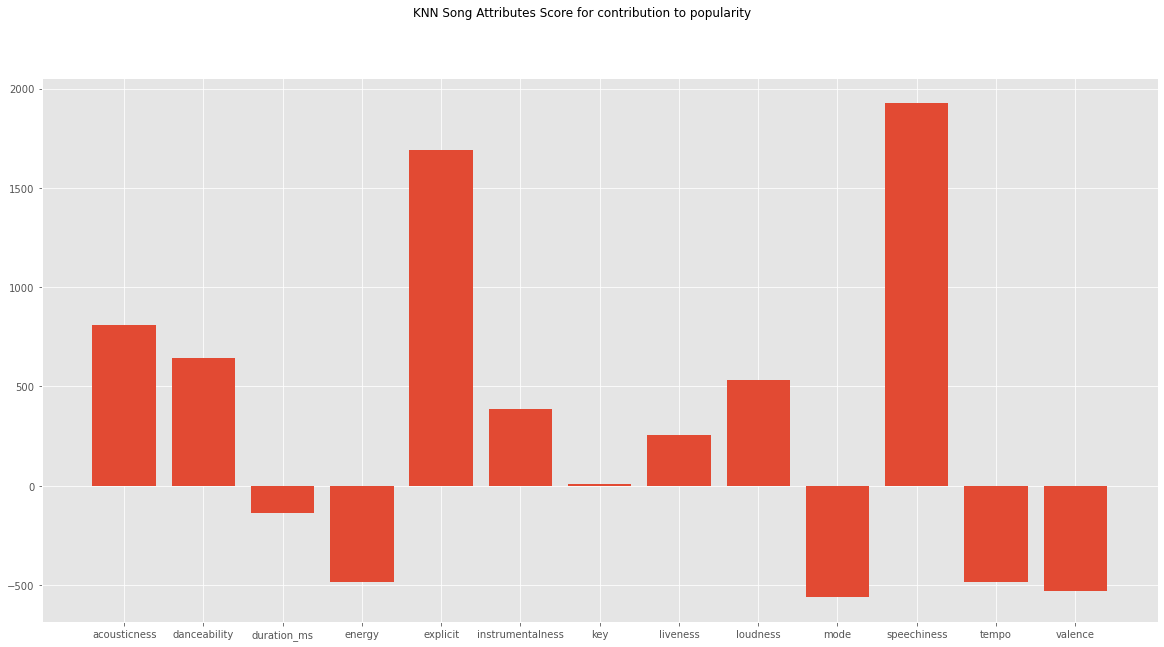

In [302]:
fig, axs = plt.subplots(1, figsize=(20, 10), sharey=True)
axs.bar(category, scoring)
fig.suptitle('KNN Song Attributes Score for contribution to popularity')

In [308]:
svc_total_attributes_value = 0
for i in range(33982):
    if pred_svc[i] == y_result[i]:
        svc_total_attributes_value += X_test[i]

In [309]:
svc_view = {'acousticness':total_attributes_value[0],
            'danceability':total_attributes_value[1],
            'duration_ms':total_attributes_value[2],
            'energy':total_attributes_value[3],
            'explicit':total_attributes_value[4],
            'instrumentalness':total_attributes_value[5],
            'key':total_attributes_value[6],
            'liveness':total_attributes_value[7],
            'loudness':total_attributes_value[8],
            'mode':total_attributes_value[9],
            'speechiness':total_attributes_value[10],
            'tempo':total_attributes_value[11],
            'valence':total_attributes_value[12]}

svc_table_view = pd.DataFrame(svc_view, index=['Score'])
svc_table_view

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
Score,808.664115,641.121877,-139.144246,-485.377085,1689.514655,385.968041,9.027675,255.363779,531.388652,-561.967191,1927.025909,-483.293075,-532.175078


In [310]:
svc_category = list(svc_table_view.keys())

In [311]:
svc_scoring = list(svc_total_attributes_value)

Text(0.5, 0.98, 'SVC Song Attributes Score for contribution to popularity')

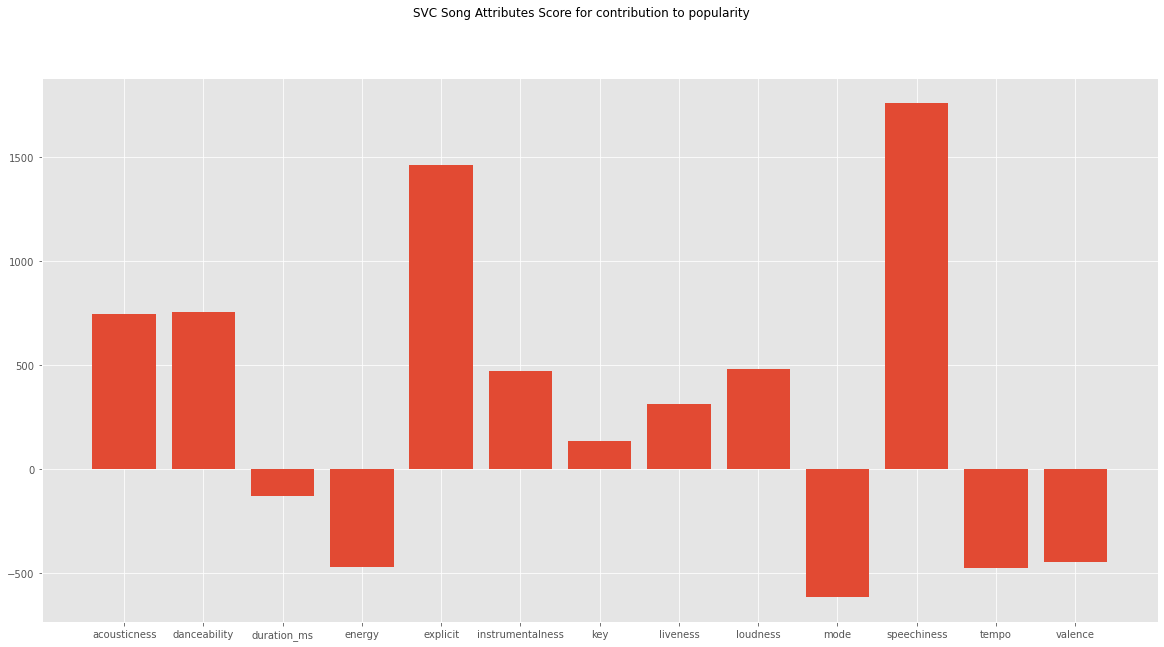

In [312]:
fig, axs = plt.subplots(1, figsize=(20, 10), sharey=True)
axs.bar(svc_category, svc_scoring)
fig.suptitle('SVC Song Attributes Score for contribution to popularity')

## H. Conclusion

As a conclusion, acousticness, danceability, explicit, instrumentalness, key, liveness, loudness and speechiness are the song's attributes that have positive impact toward song's popularity. In fact, duration_ms, energy, mode, tempo, and valence have negative impact towards song's popularity. Our conclusion support by the histogram of KNN and SVC because both of them generates almost the same result.

## I. References
* https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
* https://scikit-learn.org/stable/modules/svm.html
* https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#:~:text=Example%20of%20Receiver%20Operating%20Characteristic,rate%20on%20the%20X%20axis.
* https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034358&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9072938&gclid=EAIaIQobChMI3vvzi5Tl6wIVtcEWBR0__gi-EAAYASAAEgKjefD_BwE
* https://www.datacamp.com/community/tutorials/for-loops-in-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034358&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9072938&gclid=EAIaIQobChMIm_D-i6vl6wIVF6mWCh0Y1gkNEAAYASAAEgJhffD_BwE
* https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/categorical_variables.html